In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
print(os.getcwd())

/Users/we/Downloads/GCS data/테스트/애니메이션


In [3]:
data = pd.read_csv('part-00000-fcc822fb-1fd7-48d9-b743-237e3aa3096c-c000.csv')

In [4]:
data.shape

(13825, 8)

In [5]:
data.head()

,did,orderId,mid,orderDate,dcateCd,scateCd,mcateCd,lcateCd
0,100426248,2277751,13555714,20180726,4101093,3100206,2100026,1100005
1,101986513,2762686,8459169,20180808,4101093,3100206,2100026,1100005
2,101986513,2667354,1288545,20180807,4101093,3100206,2100026,1100005
3,101986513,2687749,1745967,20180807,4101093,3100206,2100026,1100005
4,101986513,2729878,17015669,20180808,4101093,3100206,2100026,1100005


In [6]:
data.mid.nunique()

1585

In [7]:
data.sort_values(by=['mid', 'orderDate'], inplace = True)

In [8]:
data.head()

,did,orderId,mid,orderDate,dcateCd,scateCd,mcateCd,lcateCd
728,101986884,2653173,0,20180807,4101093,3100206,2100026,1100005
4385,101986501,2653176,0,20180807,4101093,3100206,2100026,1100005
9667,101985420,2653177,0,20180807,4101093,3100206,2100026,1100005
12015,101986658,2653174,0,20180807,4101093,3100206,2100026,1100005
13734,101986637,2653175,0,20180807,4101093,3100206,2100026,1100005


In [9]:
data[data.mid == 0].shape   # 비회원 데이터 규모

(37, 8)

## # orderDate를 datetime 형식으로!

In [10]:
pd.to_datetime(data.orderDate, format='%Y%m%d').head(10) # 이렇게 format을 맞춰야해

728     2018-08-07
4385    2018-08-07
9667    2018-08-07
12015   2018-08-07
13734   2018-08-07
61      2018-08-08
610     2018-08-08
4391    2018-08-08
6284    2018-08-08
7329    2018-08-08
Name: orderDate, dtype: datetime64[ns]

In [11]:
data.orderDate = pd.to_datetime(data.orderDate, format='%Y%m%d')

## mid != 0 

In [12]:
data = data[data.mid != 0]   # 비회원 빼고!

In [13]:
data.head()

,did,orderId,mid,orderDate,dcateCd,scateCd,mcateCd,lcateCd
882,101986884,2651538,1005080,2018-08-07,4101093,3100206,2100026,1100005
9542,101985420,2651539,1005080,2018-08-07,4101093,3100206,2100026,1100005
12525,101987247,2651537,1005080,2018-08-07,4101093,3100206,2100026,1100005
13031,101987322,2651536,1005080,2018-08-07,4101093,3100206,2100026,1100005
13682,101986637,2651535,1005080,2018-08-07,4101093,3100206,2100026,1100005


In [14]:
mid = data.mid.unique()

In [15]:
data[data.mid == mid[0]]

,did,orderId,mid,orderDate,dcateCd,scateCd,mcateCd,lcateCd
882,101986884,2651538,1005080,2018-08-07,4101093,3100206,2100026,1100005
9542,101985420,2651539,1005080,2018-08-07,4101093,3100206,2100026,1100005
12525,101987247,2651537,1005080,2018-08-07,4101093,3100206,2100026,1100005
13031,101987322,2651536,1005080,2018-08-07,4101093,3100206,2100026,1100005
13682,101986637,2651535,1005080,2018-08-07,4101093,3100206,2100026,1100005


In [16]:
data[data.mid == mid[0]].orderDate  # 오 이사람 8월 7일에만 구매했네!

882     2018-08-07
9542    2018-08-07
12525   2018-08-07
13031   2018-08-07
13682   2018-08-07
Name: orderDate, dtype: datetime64[ns]

In [31]:
data[data.mid == mid[0]].orderDate.diff().dt.days # 첫 날은 na가 될거야

882      NaN
9542     0.0
12525    0.0
13031    0.0
13682    0.0
Name: orderDate, dtype: float64

In [32]:
data[data.mid == mid[0]].orderDate.diff().dt.days.dropna()  # dropna

<bound method Series.dropna of 882      NaN
9542     0.0
12525    0.0
13031    0.0
13682    0.0
Name: orderDate, dtype: float64>

In [36]:
data[data.mid == mid[0]].orderDate.diff().dt.days.dropna()

9542     0.0
12525    0.0
13031    0.0
13682    0.0
Name: orderDate, dtype: float64

In [65]:
700/6802*100

10.291090855630697

---

In [22]:
data[data.mid == mid[1]].orderDate

2641    20180907
3385    20180907
5006    20180907
6638    20180907
8947    20180907
Name: orderDate, dtype: int64

In [31]:
data[data.mid == mid[2]].orderDate

1346    20180907
2214    20180907
3354    20180907
5654    20180907
8833    20180907
Name: orderDate, dtype: int64

In [32]:
data[data.mid == mid[3]].orderDate

21       20180808
1160     20180808
4530     20180808
7731     20180808
9471     20180808
10202    20180808
11052    20180808
12102    20180808
12293    20180808
12754    20180808
13757    20180808
Name: orderDate, dtype: int64

In [33]:
data[data.mid == mid[4]].orderDate

30       20180808
798      20180808
1013     20180808
4005     20180808
4557     20180808
6041     20180808
7768     20180808
9526     20180808
9977     20180808
10410    20180808
10448    20180808
10763    20180808
11957    20180808
12049    20180808
12251    20180808
12302    20180808
12672    20180808
13642    20180808
Name: orderDate, dtype: int64

In [41]:
data.shape

(13788, 8)

In [42]:
data.head()

,did,orderId,mid,orderDate,dcateCd,scateCd,mcateCd,lcateCd
882,101986884,2651538,1005080,2018-08-07,4101093,3100206,2100026,1100005
9542,101985420,2651539,1005080,2018-08-07,4101093,3100206,2100026,1100005
12525,101987247,2651537,1005080,2018-08-07,4101093,3100206,2100026,1100005
13031,101987322,2651536,1005080,2018-08-07,4101093,3100206,2100026,1100005
13682,101986637,2651535,1005080,2018-08-07,4101093,3100206,2100026,1100005


## # time - difference 구하기

In [52]:
time = np.array( [] )
for i in range(data.mid.nunique()):
    time = np.append(time, data[data.mid == mid[i]].orderDate.diff().dt.days.dropna() ) 

In [60]:
data[:20]

,did,orderId,mid,orderDate,dcateCd,scateCd,mcateCd,lcateCd
882,101986884,2651538,1005080,2018-08-07,4101093,3100206,2100026,1100005
9542,101985420,2651539,1005080,2018-08-07,4101093,3100206,2100026,1100005
12525,101987247,2651537,1005080,2018-08-07,4101093,3100206,2100026,1100005
13031,101987322,2651536,1005080,2018-08-07,4101093,3100206,2100026,1100005
13682,101986637,2651535,1005080,2018-08-07,4101093,3100206,2100026,1100005
2641,109945505,3804394,1005500,2018-09-07,4101093,3100206,2100026,1100005
3385,109946062,3804396,1005500,2018-09-07,4101093,3100206,2100026,1100005
5006,109947353,3804398,1005500,2018-09-07,4101093,3100206,2100026,1100005
6638,109946541,3804397,1005500,2018-09-07,4101093,3100206,2100026,1100005
8947,109945182,3804395,1005500,2018-09-07,4101093,3100206,2100026,1100005


In [59]:
data[:20].orderDate.diff().dt.days.dropna()

9542      0.0
12525     0.0
13031     0.0
13682     0.0
2641     31.0
3385      0.0
5006      0.0
6638      0.0
8947      0.0
1346      0.0
2214      0.0
3354      0.0
5654      0.0
8833      0.0
21      -30.0
1160      0.0
4530      0.0
7731      0.0
9471      0.0
Name: orderDate, dtype: float64

---

In [53]:
time.shape

(12204,)

In [54]:
time

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
t = pd.DataFrame(time)

In [56]:
t.columns = ['time']

In [57]:
t.time.value_counts()

0.0    12201
1.0        3
Name: time, dtype: int64

In [62]:
t.to_excel('animation_interval.xlsx')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e27fef0>]],
      dtype=object)

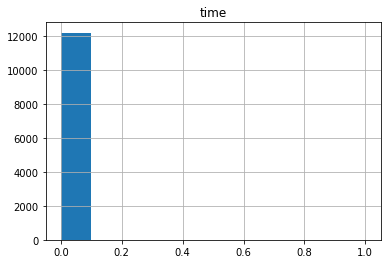

In [63]:
t.hist()

In [57]:
t.time.value_counts()

0.0    12201
1.0        3
Name: time, dtype: int64